<a href="https://colab.research.google.com/github/SHowMik024/Pytorch-tutorials/blob/main/Simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F




In [19]:
class Model(nn.Module):

  def __init__(self, in_features=4, h1=8, h2=9,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [20]:
torch.manual_seed(41)
model = Model()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [3]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [4]:
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',0.1)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
X = my_df.drop('variety',axis = 1)
y = my_df['variety']

In [7]:
X = X.values
y = y.values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=41)

In [16]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [17]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [21]:
#Criteria of model to measure the error
criterion = nn.CrossEntropyLoss()
#Choose Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(),lr=0.1)

In [23]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'Epoch:{i} and loss:{loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch:0 and loss:0.01641795039176941
Epoch:10 and loss:0.018373867496848106
Epoch:20 and loss:0.01815052144229412
Epoch:30 and loss:0.0150320278480649
Epoch:40 and loss:0.014019552618265152
Epoch:50 and loss:0.012351303361356258
Epoch:60 and loss:0.012484965845942497
Epoch:70 and loss:0.013511854223906994
Epoch:80 and loss:0.012460027821362019
Epoch:90 and loss:0.011226109229028225


Text(0.5, 0, 'Epoch')

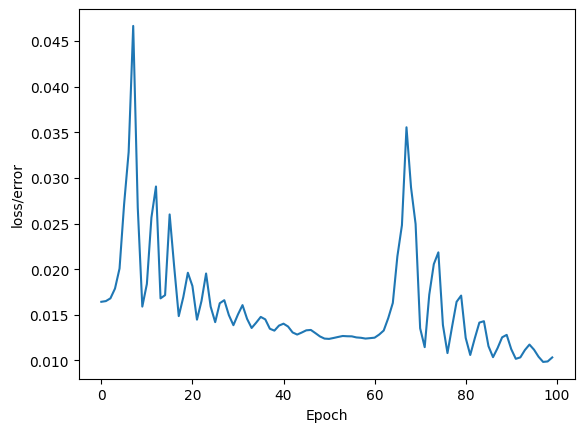

In [26]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')